Matala 2 - pandas + Regular Expressions
Noam Ifargan 

In [48]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import datetime

In [49]:
#read csv file
datafile = "C:\\Users\\noami\\Desktop\\dataformatala2\\matala2_cosmetics_2019-Nov.csv"
data = pd.read_csv(datafile)
data

<ipython-input-49-4f4a9561e180>:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(datafile)


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02 UTC,view,5802432,1.487580e+18,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09 UTC,cart,5844397,1.487580e+18,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10 UTC,view,5837166,1.784000e+18,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11 UTC,cart,5876812,1.487580e+18,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,1.487580e+18,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
...,...,...,...,...,...,...,...,...,...
1048570,2019-11-08 11:17:27 UTC,remove_from_cart,5888061,1.487580e+18,NaN,shik,5.71,568919150,e2588ec8-e3ac-452f-9d14-c679879c6679
1048571,2019-11-08 11:17:27 UTC,view,5843812,1.487580e+18,NaN,NaN,2.78,410153810,b9c05605-bdfc-47a1-8742-120c989b99e6
1048572,2019-11-08 11:17:27 UTC,cart,5875273,1.487580e+18,NaN,NaN,7.46,402986169,dd9d10cd-9993-9ca3-5828-afb8abec851d
1048573,2019-11-08 11:17:28 UTC,view,5854812,1.602940e+18,NaN,grattol,5.24,568926108,6b3c6855-efea-4c02-9da6-e7c5a988628a


Q1

In [50]:
#format of datetime
data['event_time']= pd.to_datetime(data['event_time'])
data['event_time'] = pd.to_datetime(data['event_time'], format='%Y-%m-%d %H:%M:%S.%f')
#newcolumns
data['TimeHMS'] = pd.to_datetime(data['event_time'].dt.time, format='%H:%M:%S')
data['TimeHMS'].unique()
data['Date'] = pd.to_datetime(data['event_time'].dt.date)
data['Date'].unique()
data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,TimeHMS,Date
0,2019-11-01 00:00:02+00:00,view,5802432,1.487580e+18,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,1900-01-01 00:00:02,2019-11-01
1,2019-11-01 00:00:09+00:00,cart,5844397,1.487580e+18,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,1900-01-01 00:00:09,2019-11-01
2,2019-11-01 00:00:10+00:00,view,5837166,1.784000e+18,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f,1900-01-01 00:00:10,2019-11-01
3,2019-11-01 00:00:11+00:00,cart,5876812,1.487580e+18,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7,1900-01-01 00:00:11,2019-11-01
4,2019-11-01 00:00:24+00:00,remove_from_cart,5826182,1.487580e+18,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,1900-01-01 00:00:24,2019-11-01
...,...,...,...,...,...,...,...,...,...,...,...
1048570,2019-11-08 11:17:27+00:00,remove_from_cart,5888061,1.487580e+18,NaN,shik,5.71,568919150,e2588ec8-e3ac-452f-9d14-c679879c6679,1900-01-01 11:17:27,2019-11-08
1048571,2019-11-08 11:17:27+00:00,view,5843812,1.487580e+18,NaN,NaN,2.78,410153810,b9c05605-bdfc-47a1-8742-120c989b99e6,1900-01-01 11:17:27,2019-11-08
1048572,2019-11-08 11:17:27+00:00,cart,5875273,1.487580e+18,NaN,NaN,7.46,402986169,dd9d10cd-9993-9ca3-5828-afb8abec851d,1900-01-01 11:17:27,2019-11-08
1048573,2019-11-08 11:17:28+00:00,view,5854812,1.602940e+18,NaN,grattol,5.24,568926108,6b3c6855-efea-4c02-9da6-e7c5a988628a,1900-01-01 11:17:28,2019-11-08


In [61]:
data['TimeGB_user_session'] = data.groupby(['user_session'])['TimeHMS'].shift(-1).fillna(data['TimeHMS'])
#diff between all of the user session
data['duration_to_next_event'] = (data['TimeGB_user_session']- data['TimeHMS']).dt.seconds
data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,TimeHMS,Date,TimeGB_user_session,duration_to_next_event,T/F,funnel_number,index_in_funnel
0,2019-11-01 00:00:02+00:00,view,5802432,1.487580e+18,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,1900-01-01 00:00:02,2019-11-01,1900-01-01 00:00:25,23,0,1,1
1,2019-11-01 00:00:09+00:00,cart,5844397,1.487580e+18,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,1900-01-01 00:00:09,2019-11-01,1900-01-01 00:00:24,15,0,1,1
2,2019-11-01 00:00:10+00:00,view,5837166,1.784000e+18,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f,1900-01-01 00:00:10,2019-11-01,1900-01-01 00:00:55,45,0,1,1
3,2019-11-01 00:00:11+00:00,cart,5876812,1.487580e+18,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7,1900-01-01 00:00:11,2019-11-01,1900-01-01 00:01:54,103,0,1,1
4,2019-11-01 00:00:24+00:00,remove_from_cart,5826182,1.487580e+18,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,1900-01-01 00:00:24,2019-11-01,1900-01-01 00:00:24,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2019-11-08 11:17:27+00:00,remove_from_cart,5888061,1.487580e+18,NaN,shik,5.71,568919150,e2588ec8-e3ac-452f-9d14-c679879c6679,1900-01-01 11:17:27,2019-11-08,1900-01-01 11:17:27,0,0,1,34
1048571,2019-11-08 11:17:27+00:00,view,5843812,1.487580e+18,NaN,NaN,2.78,410153810,b9c05605-bdfc-47a1-8742-120c989b99e6,1900-01-01 11:17:27,2019-11-08,1900-01-01 11:17:27,0,0,1,9
1048572,2019-11-08 11:17:27+00:00,cart,5875273,1.487580e+18,NaN,NaN,7.46,402986169,dd9d10cd-9993-9ca3-5828-afb8abec851d,1900-01-01 11:17:27,2019-11-08,1900-01-01 11:17:27,0,0,1,13
1048573,2019-11-08 11:17:28+00:00,view,5854812,1.602940e+18,NaN,grattol,5.24,568926108,6b3c6855-efea-4c02-9da6-e7c5a988628a,1900-01-01 11:17:28,2019-11-08,1900-01-01 11:17:28,0,0,1,3


Q2

In [64]:
data['TimeGB_user_session'] = data.groupby(['user_id'])['Date'].shift(1).fillna(data['Date'])
data['T/F'] = (data['Date'] - data['TimeGB_user_session']).dt.days.apply(lambda x: 1 if x > 5 else 0)


In [66]:
#sum all True values 
data['funnel_number']=data.groupby(['user_id'])['T/F'].cumsum()+1
data[data['funnel_number']>1]



,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,TimeHMS,Date,TimeGB_user_session,duration_to_next_event,T/F,funnel_number,index_in_funnel
790028,2019-11-07 00:05:23+00:00,view,5795346,1.487580e+18,NaN,strong,153.17,562512537,770e9063-c326-b154-f4bf-d1f509b007f5,1900-01-01 00:05:23,2019-11-07,2019-11-01,0,1,2,1
790396,2019-11-07 00:16:47+00:00,cart,5625247,1.487580e+18,NaN,jas,98.4,562297630,7b539e77-b75e-4773-a563-d42263f3432d,1900-01-01 00:16:47,2019-11-07,2019-11-01,0,1,2,1
791056,2019-11-07 00:46:51+00:00,view,5862325,1.487580e+18,NaN,freedecor,0.79,222225189,fcd7ce07-6702-4bc8-9f23-efc0529a1378,1900-01-01 00:46:51,2019-11-07,2019-11-01,21,1,2,1
791058,2019-11-07 00:47:12+00:00,view,5848910,1.487580e+18,NaN,bpw.style,0.79,222225189,fcd7ce07-6702-4bc8-9f23-efc0529a1378,1900-01-01 00:47:12,2019-11-07,2019-11-07,19,0,2,2
791066,2019-11-07 00:47:31+00:00,view,5851606,2.055160e+18,NaN,irisk,1.75,222225189,fcd7ce07-6702-4bc8-9f23-efc0529a1378,1900-01-01 00:47:31,2019-11-07,2019-11-07,40,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048016,2019-11-08 11:14:15+00:00,view,5802728,2.151190e+18,NaN,NaN,2.86,548920675,b67681b9-8ab2-454e-a17b-6a6517c9979f,1900-01-01 11:14:15,2019-11-08,2019-11-07,0,0,2,9
1048035,2019-11-08 11:14:19+00:00,remove_from_cart,5851220,1.526000e+18,NaN,NaN,5.08,531796051,f69cae4b-1abb-420b-8f27-7930975e9f13,1900-01-01 11:14:19,2019-11-08,2019-11-08,0,0,2,11
1048036,2019-11-08 11:14:19+00:00,remove_from_cart,5851220,1.526000e+18,NaN,NaN,5.08,531796051,f69cae4b-1abb-420b-8f27-7930975e9f13,1900-01-01 11:14:19,2019-11-08,2019-11-08,0,0,2,12
1048098,2019-11-08 11:14:39+00:00,view,5569506,1.487580e+18,NaN,NaN,10.63,545754442,4ef23c06-590a-4bb7-aa47-07f931846977,1900-01-01 11:14:39,2019-11-08,2019-11-08,0,0,2,2


Q3

In [70]:
data['index_in_funnel'] = data.groupby(['user_id', 'funnel_number'])['user_session'].cumcount() +1
data['index_in_funnel'].unique()

array([   1,    2,    3, ..., 3414, 3415, 3416], dtype=int64)

Q4

In [71]:
data['price'].unique()

array(['0.32', '2.38', '22.22', ..., 5.44, 177.06, 14.94], dtype=object)

In [83]:
def PIX_Price(x):
    price = re.findall('\S*[0-9]\S*', x)
    res = price[0]
    return float(res)

data['price'] = data['price'].astype(str).apply(PIX_Price) 


Q6

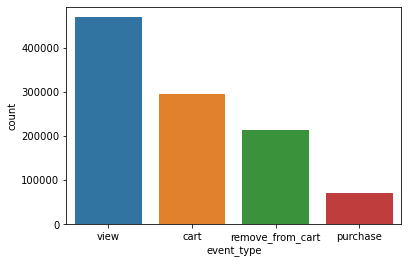

In [82]:
sns.countplot(x='event_type', data=data)
plt.show()

Q7

In [88]:
session_data = data[['user_id', 'session_id', 'funnel_number', 'index_in_funnel', 'timestamp', 'event_type', 'product_id']].copy()
session_data['total_events'] = session_data.groupby(['user_id', 'session_id'])['event_type'].transform('count')
session_data.drop_duplicates(subset=['user_id', 'session_id'], inplace=True)
session_data['duration'] = session_data.groupby(['user_id', 'session_id'])['timestamp'].transform(lambda x: (x.max()-x.min()).seconds)
session_data['list_of_viewed'] = session_data.groupby(['user_id', 'session_id'])['product_id'].transform(lambda x: x.unique().tolist())
session_data['list_of_added_to_cart'] = session_data.apply(lambda x: [x['product_id']] if x['event_type']=='cart' else None, axis=1)
session_data['list_of_added_to_cart'] = session_data.groupby(['user_id', 'session_id'])['list_of_added_to_cart'].transform(lambda x: [item for sublist in x.dropna().tolist() for item in sublist])
session_data['list_of_purchased'] = session_data.apply(lambda x: [x['product_id']] if x['event_type']=='purchase' else None, axis=1)
session_data['list_of_purchased'] = session_data.groupby(['user_id', 'session_id'])['list_of_purchased'].transform(lambda x: [item for sublist in x.dropna().tolist() for item in sublist])


KeyError: "['session_id', 'timestamp'] not in index"

In [87]:
session_data = session_data.sort_values(by='session_id')
session_data = pd.merge(session_data, additional_data, on='user_id', how='left')
session_data.rename(columns)

NameError: name 'session_data' is not defined